#  Analysis of Covid19 Dataset
### This project focus on the analysis of Covid 19 case in Nigeria. The data was created for the ilustration.


In [1]:
# Importing the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [4]:
# Reading the dataset
df=pd.read_csv("covid19_Nigeria.csv", )
df.head(3)

,Date,Time,State,Cured,Deaths,Confirmed
0,30-01-20,6:00 PM,Lagos,0,0,1
1,31-01-20,6:00 PM,Lagos,0,0,1
2,02-01-20,6:00 PM,Lagos,0,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       3351 non-null   object
 1   Time       3351 non-null   object
 2   State      3351 non-null   object
 3   Cured      3351 non-null   int64 
 4   Deaths     3351 non-null   int64 
 5   Confirmed  3351 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 157.2+ KB


#### Renaming the coulmn

In [7]:
df.head(2)

,Date,Time,State,Cured,Deaths,Confirmed
0,30-01-20,6:00 PM,Lagos,0,0,1
1,31-01-20,6:00 PM,Lagos,0,0,1


# Computing the Number of active cases

In [8]:
df['Active_Cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [9]:
df.head(4)

,Date,Time,State,Cured,Deaths,Confirmed,Active_Cases
0,30-01-20,6:00 PM,Lagos,0,0,1,1
1,31-01-20,6:00 PM,Lagos,0,0,1,1
2,02-01-20,6:00 PM,Lagos,0,0,2,2
3,02-02-20,6:00 PM,Lagos,0,0,3,3


## Converting the date column to type date
###### I noticed the date column is not a date type, so i had to convert to date .

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df1=df.groupby('State')['Confirmed','Cured','Deaths','Active_Cases'].agg('max')

C:\Users\imo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


### Creating new columns 'Recovery rate and mortality rate' to calculate the rate at which patients recover from covid and the rate at which people died as a result of covid.

In [14]:
df3=pd.pivot_table(data=df, index='State',values=['Cured','Deaths','Confirmed','Active_Cases'], aggfunc=max)


In [24]:
df3['Recovery_Rate']=df3['Cured']*100/df3['Confirmed']
df3['Mortality_Rate']=df3['Deaths']*100/df3['Confirmed']
df3.head(3)

,Active_Cases,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State,,,,,,
Abia,1426,5303,3863,15,72.845559,0.282859
Abuja,27741,62655,36602,2233,58.418323,3.563961
Adamawa,869,2402,1521,28,63.322231,1.165695


In [27]:

#df3.sort_values(by='Confirmed', ascending=False)


In [26]:
df3.style.background_gradient(cmap='cubehelix')

,Active_Cases,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State,,,,,,
Abia,1426,5303,3863,15,72.845559,0.282859
Abuja,27741,62655,36602,2233,58.418323,3.563961
Adamawa,869,2402,1521,28,63.322231,1.165695
Akwa Ibom,945,2303,1513,12,65.696917,0.521059
Anambra,4452,8674,4005,217,46.172469,2.501729
Bauchi,24,26,2,0,7.692308,0.000000
Bayelsa,3195,15232,11910,356,78.190651,2.337185
Benue,961,2137,1469,11,68.741226,0.514740
Borno,282,727,437,8,60.110041,1.100413


##  Top 10 state with active case.
#### From the result, I discovered that Lagos top the chart, followed by Abuja and Rivers.

In [16]:
top_10_state_active_cases=df.groupby('State').max()[['Active_Cases','Date',]].sort_values(by=['Active_Cases'], ascending=False).reset_index()

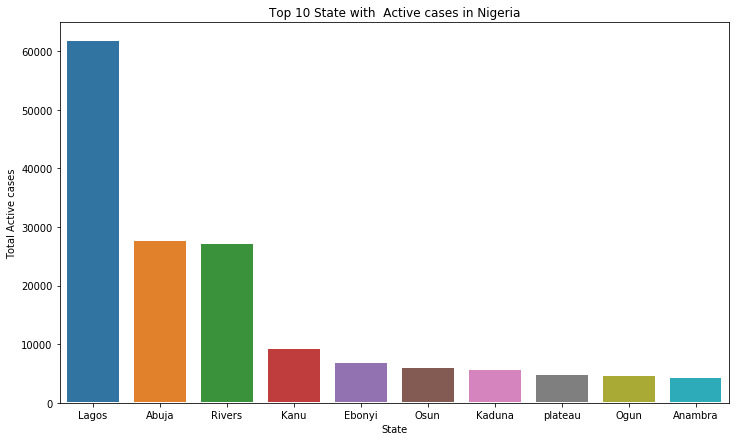

In [17]:
fig=plt.figure(figsize=(12,7))
ax=sns.barplot(data=top_10_state_active_cases.iloc[:10],y='Active_Cases', x= 'State', linewidth=2, edgecolor='white')

plt.xlabel('State')
plt.title('Top 10 State with  Active cases in Nigeria', size=12)
plt.ylabel('Total Active cases')
plt.show()

# ##  Top 10 state with death case.
#### From the result, I discovered that Lagos top the chart, followed by Abuja and Ebonyi.

In [29]:
top_10_Deaths_cases=df.groupby('State').max()[['Deaths','Date',]].sort_values(by=['Deaths'], ascending=False).reset_index()

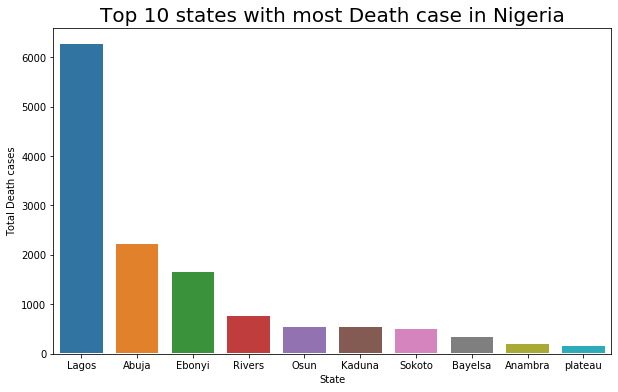

In [30]:
fig=plt.figure(figsize=(10,6))
ax=sns.barplot(data=top_10_Deaths_cases.iloc[:10],y='Deaths', x= 'State', linewidth=2, edgecolor='white')
plt.xlabel('State')
plt.title('Top 10 states with most Death case in Nigeria', size=20)
plt.ylabel('Total Death cases')
plt.show()

## Growth trend
### I created a line plot to check the growth trend using states with high value of cases.

Text(0, 0.5, 'Active cases')

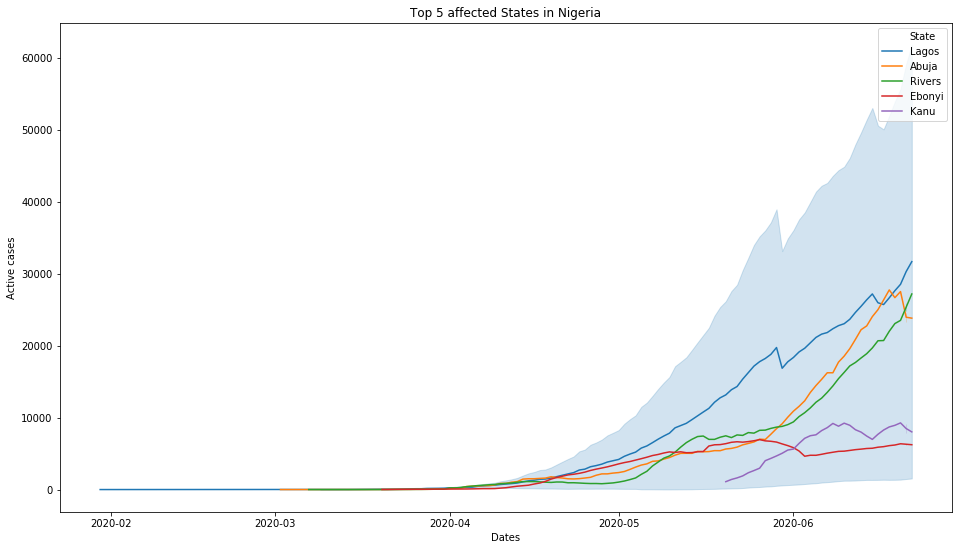

In [31]:
fig =plt.figure(figsize=(16,9))
ax=sns.lineplot(data=df[df['State'].isin(['Lagos', 'Abuja', 'Rivers', 'Kanu', 'Ebonyi'])],x='Date',y ='Active_Cases',hue='State')
ax.set_title('Top 5 affected States in Nigeria')
plt.xlabel('Dates')
plt.ylabel('Active cases')